<a href="https://colab.research.google.com/github/Ramkuchana/RevisingConcepts/blob/master/RevisingPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2022 AssemblyAI Team.

# PyTorch Crash Course

#### Overview:

1. Tensor Basics
  - Create, Operations, NumPy, GPU Support
2. Autograd
  - Linear regression example
3. Training Loop with: Model, Loss & Optimizer
  - A typical PyTorch training pipeline
4. Neural Network
  - Also: GPU, Datasets, DataLoader, Transforms & Evaluation
5. Convolutional Neural Network
  - Also: Save/Load model

Created by [AssemblyAI](https://www.assemblyai.com)

Watch the video:

 [![Alt text](https://img.youtube.com/vi/OIenNRt2bjg/hqdefault.jpg)](https://youtu.be/mYUyaKmvu6Y)

## 1. Tensors

Everything in PyTorch is based on Tensor operations. A Tensor is a multi-dimensional matrix containing elements of a single data type:


* Brackets in the output gives you no. of dimensions of Tensor

* read shape or size of tensor from left to right

for example,


(2,2,2,3) means we have 2 (2,2,3) tensors
then within (2,2,3) we have 2 (2,3) tensors
then (2,3) can be seen as matrix

also note
last value in size gives total no. of elements in all units
example:  In (2,2,2,3) , each unit has 3 elements in it

In [1]:
import torch

# torch.empty(size): uninitiallized
x = torch.empty(1) # scalar
print("empty(1):", x, end="\n\n")
x = torch.empty(3) # vector
print("empty(3):",x, end="\n\n")

x = torch.empty(2, 3) # matrix
print("empty(2,3):",x, end="\n\n")

y = torch.empty(2, 2, 3) # tensor, 3 dimensions
print("empty(2, 2, 3):",y, end="\n\n")


x = torch.empty(2,2,2,3) # tensor, 4 dimensions
print("empty(2,2,2,3):",x, end="\n\n")

# torch.rand(size): random numbers [0, 1]
x = torch.rand(5, 3)
print("rand(5,3):", x, end="\n\n")

# torch.zeros(size), fill with 0
# torch.ones(size), fill with 1
x = torch.zeros(5, 3)
print("zeros(5,3):", x, end="\n\n")

empty(1): tensor([4.4721e+21])

empty(3): tensor([-1.1059e+04,  4.3266e-41, -1.1059e+04])

empty(2,3): tensor([[-1.1059e+04,  4.3266e-41,  1.7048e-12],
        [ 3.2301e-41,  0.0000e+00,  3.2301e-41]])

empty(2, 2, 3): tensor([[[ 3.1688e-13,  3.2301e-41, -1.4209e+14],
         [ 4.3265e-41,  1.4013e-45,  0.0000e+00]],

        [[ 7.0065e-45,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00]]])

empty(2,2,2,3): tensor([[[[-6.8577e+03,  4.3266e-41, -6.7137e+03],
          [ 4.3266e-41, -1.4990e+14,  4.3265e-41]],

         [[-1.4136e+14,  4.3265e-41,  1.1732e-24],
          [ 4.3266e-41,  2.0319e-43,  0.0000e+00]]],


        [[[ 1.9469e-12,  3.2301e-41, -1.1059e+04],
          [ 4.3266e-41,  1.9476e-12,  3.2301e-41]],

         [[ 1.9468e-12,  3.2301e-41, -1.4991e+14],
          [ 4.3265e-41, -1.2709e-07,  4.3266e-41]]]])

rand(5,3): tensor([[0.1211, 0.1975, 0.7579],
        [0.0622, 0.3371, 0.9537],
        [0.9665, 0.8592, 0.7727],
        [0.9592, 0.0492, 0.

In [5]:
torch.ones((2,3,)) == torch.ones(2,3)

tensor([[True, True, True],
        [True, True, True]])

In [2]:
# check size

print("size", x.size())  # x.size(0)
print("shape", x.shape)  # x.shape[0]

size torch.Size([5, 3])
shape torch.Size([5, 3])


In [3]:
y.shape

torch.Size([2, 2, 3])

In [4]:
# check data type
print(x.dtype)

# specify types, float32 default
x = torch.zeros(5, 3, dtype=torch.float16)
print(x)

# check type
print(x.dtype)

torch.float32
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float16)
torch.float16


In [5]:
y = torch.rand(2,2, dtype=torch.float64)
print(y)

print(y.dtype)

tensor([[0.7316, 0.0106],
        [0.7710, 0.1873]], dtype=torch.float64)
torch.float64


In [6]:
# construct from data

x = torch.tensor([5.5, 3])
print(x, x.dtype)

tensor([5.5000, 3.0000]) torch.float32


In [7]:
y = torch.tensor([[[7.2,7,3,4.5],[2.2,3.3,4,6]]], dtype=torch.float64)

print(y)
print(y.shape)
print(y.dtype)

tensor([[[7.2000, 7.0000, 3.0000, 4.5000],
         [2.2000, 3.3000, 4.0000, 6.0000]]], dtype=torch.float64)
torch.Size([1, 2, 4])
torch.float64


In [8]:
# requires_grad argument
# This will tell pytorch that it will need to calculate the gradients for this tensor
# later in your optimization steps
# i.e. this is a variable in your model that you want to optimize

x = torch.tensor([5.5, 3], requires_grad=True)
print(x)

tensor([5.5000, 3.0000], requires_grad=True)


#### Operations with Tensors

In [9]:
# Operations
x = torch.ones(2, 2)
y = torch.rand(2, 2)

# elementwise addition
z = x + y
# torch.add(x,y)

# in place addition, everythin with a trailing underscore is an inplace operation
# i.e. it will modify the variable
# y.add_(x)

print(x, end="\n\n")
print(y, end="\n\n")
print(z, end="\n\n")

tensor([[1., 1.],
        [1., 1.]])

tensor([[0.6690, 0.7624],
        [0.6110, 0.9063]])

tensor([[1.6690, 1.7624],
        [1.6110, 1.9063]])



In [10]:
# subtraction
z = x - y
z = torch.sub(x, y)
print(z)

# multiplication
z = x * y
z = torch.mul(x,y)
print(z)

# division
z = x / y
z = torch.div(x,y)
print(z)
print(z.dtype)

tensor([[0.3310, 0.2376],
        [0.3890, 0.0937]])
tensor([[0.6690, 0.7624],
        [0.6110, 0.9063]])
tensor([[1.4948, 1.3116],
        [1.6365, 1.1034]])
torch.float32


In [11]:
# Slicing

x = torch.rand(5,3)
print(x, end="\n\n")
print("Type of x:", x.type(), end='\n\n') # object.type() is a pytorch method
print("Type of x:", type(x), end='\n\n') # type(object) is a python method

print("x[:, 0]", x[:, 0]) # all rows, column 0
print("x[:, 0]", x[:, 0].size()) # shape
print("Type of x[:, 0]:", x[:, 0].type(), end='\n\n') # type


print("x[1, :]", x[1, :], end='\n\n') # row 1, all columns


print("x[1, 1]", x[1,1]) # element at 1, 1
print("Shape of x[1, 1]", x[1,1].size()) #shape
print("Type of Shape of x[1, 1]:", x[1,1].type)

# Get the actual value if only 1 element in your tensor
print("x[1,1].item()", x[1,1].item())

tensor([[0.1906, 0.9609, 0.9288],
        [0.2768, 0.5001, 0.7730],
        [0.8265, 0.3006, 0.2364],
        [0.0186, 0.1227, 0.6379],
        [0.6838, 0.2911, 0.3236]])

Type of x: torch.FloatTensor

Type of x: <class 'torch.Tensor'>

x[:, 0] tensor([0.1906, 0.2768, 0.8265, 0.0186, 0.6838])
x[:, 0] torch.Size([5])
Type of x[:, 0]: torch.FloatTensor

x[1, :] tensor([0.2768, 0.5001, 0.7730])

x[1, 1] tensor(0.5001)
Shape of x[1, 1] torch.Size([])
Type of Shape of x[1, 1]: <built-in method type of Tensor object at 0x7cce140c4220>
x[1,1].item() 0.5001376867294312


Notice when you are accessing a value
even though it is a Tensor it does not have size

Example,
x[1,1]



In [11]:
k = torch.rand(3,2)

print(k, end="\n\n")

print('*'*30)
#print("k[:, 0]", k[:, 0], end="\n\n") # all rows, column 0

k[...,0] == k[:,0]



tensor([[0.4471, 0.9728],
        [0.1014, 0.1455],
        [0.0265, 0.7279]])

******************************


tensor([True, True, True])

In [13]:
# Reshape with torch.view()


x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions



print(x, end='\n\n')
print(y, end='\n\n')
print(z, end='\n\n')


# if -1 it pytorch will automatically determine the necessary size
print(x.size(), y.size(), z.size())

tensor([[-1.4748e-01, -1.3698e+00, -2.1118e-01,  7.7218e-01],
        [-6.6691e-01,  1.0735e-03,  5.6287e-02, -1.6219e+00],
        [ 3.5361e-01, -8.9562e-01,  6.0913e-01,  2.5152e-01],
        [-1.2433e-01,  1.6947e-01,  1.1042e+00, -1.9922e-01]])

tensor([-1.4748e-01, -1.3698e+00, -2.1118e-01,  7.7218e-01, -6.6691e-01,
         1.0735e-03,  5.6287e-02, -1.6219e+00,  3.5361e-01, -8.9562e-01,
         6.0913e-01,  2.5152e-01, -1.2433e-01,  1.6947e-01,  1.1042e+00,
        -1.9922e-01])

tensor([[-1.4748e-01, -1.3698e+00, -2.1118e-01,  7.7218e-01, -6.6691e-01,
          1.0735e-03,  5.6287e-02, -1.6219e+00],
        [ 3.5361e-01, -8.9562e-01,  6.0913e-01,  2.5152e-01, -1.2433e-01,
          1.6947e-01,  1.1042e+00, -1.9922e-01]])

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


#### NumPy

Converting a Torch Tensor to a NumPy array and vice versa is very easy

In [6]:
a = torch.ones(5)
print(a)

# torch to numpy with .numpy()
b = a.numpy()
print(b)
print(type(b))

print()
print(id(a))
print(id(b))


b

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>

132610550525808
132610709306128


array([1., 1., 1., 1., 1.], dtype=float32)

Notice that when using with PRINT()
in Tensor,\
the output tensor mentions tensor and has commas


whereas in Numpy,\
there's no commas in Numpy and no mention of Numpy in the output

In [16]:
# Careful: If the Tensor is on the CPU (not the GPU),
# both objects will share the same memory location, so changing one
# will also change the other

a.add_(1) # inplace addition cuz we using function_() with underscore


print(a)
print(b)

print(id(a))
print(id(b))


tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]
137224542742192
137224541217552


In [15]:
# practice

i = torch.rand(3,3)
print(i)
print(type(i), end = '\n\n')


j = i.numpy()
print(j, end = '\n\n')
print(type(j))

tensor([[0.6132, 0.6483, 0.1509],
        [0.9733, 0.0930, 0.9081],
        [0.0147, 0.0315, 0.0233]])
<class 'torch.Tensor'>

[[0.61318016 0.6483491  0.1508916 ]
 [0.9732614  0.09297246 0.90811366]
 [0.01470047 0.03150743 0.02330875]]

<class 'numpy.ndarray'>


In [18]:
# numpy to torch with .from_numpy(x), or torch.tensor() to copy it

import numpy as np
a = np.ones(5)
b = torch.from_numpy(a) # shares memory
c = torch.tensor(a) # creates copy
print(a)
print(b)
print(c)

# again be careful when modifying
a += 1
print(a)
print(b)
print(c)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


#### GPU Support

By default all tensors are created on the CPU.

But we can also **move** them to the GPU (if it's available ),\
or\
create them directly on the GPU.

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # activates first GPU


x = torch.rand(2,2).to(device)  # move tensors to GPU device

#x = x.to("cpu")

# since we named our GPU as 'cuda' and CPU as 'cpu'
# you can direclty move it with  without using variable 'device'

#x = x.to("cuda")

x = torch.rand(2,2, device=device)  # or directy create them on GPU

Creating directly on GPU is efficient if we know we need to use GPU????

since it does not involve moving from cpu to gpu ?

## 2. Autograd

The autograd package provides automatic differentiation for all operations on Tensors. Generally speaking, *torch.autograd* is an engine for computing the vector-Jacobian product. It computes partial derivates while applying the chain rule.

Set `requires_grad = True`:

In [19]:
import torch

# requires_grad = True -> tracks all operations on the tensor.
x = torch.randn(3, requires_grad=True)
y = x + 2

# y was created as a result of an operation, so it has a grad_fn attribute.
# grad_fn: references a Function that has created the Tensor
print(x) # created by the user -> grad_fn is None
print(y)
print(y.grad_fn)

tensor([1.6405, 0.3465, 0.1586], requires_grad=True)
tensor([3.6405, 2.3465, 2.1586], grad_fn=<AddBackward0>)


In [20]:
# Do more operations on y
z = y * y * 3
print(z)
z = z.mean()
print(z)

tensor([39.7601, 16.5186, 13.9792], grad_fn=<MulBackward0>)
tensor(23.4193, grad_fn=<MeanBackward0>)


In [21]:
# Let's compute the gradients with backpropagation
# When we finish our computation we can call .backward() and have all the gradients computed automatically.
# The gradient for this tensor will be accumulated into .grad attribute.
# It is the partial derivate of the function w.r.t. the tensor

print(x.grad) # before backward propagation, .grad() is None
z.backward()
print(x.grad) # dz/dx

# !!! Careful!!! backward() accumulates the gradient for this tensor into .grad attribute

# we need to empty gradients after each iteration
# !!! We need to be careful during optimization !!! optimizer.zero_grad()


None
tensor([7.2810, 4.6931, 4.3173])


#### Stop a tensor from tracking history:

For example during the training loop
when we want to update our weights,\
or\
after training during evaluation.

These operations should not be part of the gradient computation. To prevent this, we can use:

- `x.requires_grad_(False)`
- `x.detach()`
- wrap in `with torch.no_grad():`

In [24]:
# .requires_grad_(...) changes an existing flag in-place.

a = torch.randn(2, 2)  # requires_grad_ = False by default
b = (a * a).sum()
print(a.requires_grad)
print(f"grad_fn is {b.grad_fn}")

a.requires_grad_(True) # can also be used to set to False
b = (a * a).sum() # redo-operations after setting it to True
print(a.requires_grad)
print(f"grad_fn is {b.grad_fn}")

False
grad_fn is None
True
grad_fn is <SumBackward0 object at 0x789bccc08190>


In [25]:
# .detach(): get a new Tensor with the same content but no gradient computation: i.e. tensor with requires_grad_ = False

a = torch.randn(2, 2, requires_grad=True)
b = a.detach()
print(a.requires_grad)
print(b.requires_grad)

True
False


In [26]:
# wrap in 'with torch.no_grad():'
a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad)

with torch.no_grad():
    b = a ** 2
    print(b.requires_grad)

True
False


## Gradient Descent with Autograd Package
Linear Regression example:

$f(x) = w * x + b$

here : `f(x) = 2 * x`

In [3]:
import torch

# Linear regression
# f = w * x  + b
# here : f = 2 * x

X = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8], dtype=torch.float32)

print(X, end = '\n\n')
print(X.shape, end = '\n\n')
Y = torch.tensor([2, 4, 6, 8, 10, 12, 14, 16], dtype=torch.float32) # f = y = 2 * x


w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True) # weights tensor
# requires_grad=True = true cuz we need to calculate gradient wrt weights
# operations on w are tracked


# model output
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

# create test sample
X_test = 5.0

print(f'Prediction before training: f({X_test}) = {forward(X_test).item():.3f}')

# weights are not optimised yet so prediciton is 0 in forward pass instead of 10

tensor([1., 2., 3., 4., 5., 6., 7., 8.])

torch.Size([8])

Prediction before training: f(5.0) = 0.000


In [28]:
# Training
learning_rate = 0.01
n_epochs = 100

for epoch in range(n_epochs):
    # predict = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    #w.data = w.data - learning_rate * w.grad
    with torch.no_grad():
      w -= learning_rate * w.grad

    # zero/empty the gradients after updating
    w.grad.zero_()

    if (epoch+1) % 10 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.3f}')

print(f'Prediction after training: f({X_test}) = {forward(X_test).item():.3f}')

epoch 10: w = 1.998, loss = 0.000
epoch 20: w = 2.000, loss = 0.000
epoch 30: w = 2.000, loss = 0.000
epoch 40: w = 2.000, loss = 0.000
epoch 50: w = 2.000, loss = 0.000
epoch 60: w = 2.000, loss = 0.000
epoch 70: w = 2.000, loss = 0.000
epoch 80: w = 2.000, loss = 0.000
epoch 90: w = 2.000, loss = 0.000
epoch 100: w = 2.000, loss = 0.000
Prediction after training: f(5.0) = 10.000


## 3. Model, Loss & Optimizer

So far we have not used any of the pytorchs inbuilt capabilities\
we have written everything for everything

now lets look at how\
A typical PyTorch pipeline looks like this:

1. Design model (input, output, forward pass with different layers)
2. Construct loss and optimizer
3. Training loop:
  - Forward = compute prediction and loss
  - Backward = compute gradients
  - Update weights

In [7]:
import torch
import torch.nn as nn # neural network module

# Linear regression
# f = w * x
# here : f = 2 * x

# 0) Training samples, watch the shape! the module expect like this so that we have clear no. of samples and features
X = torch.tensor([[1], [2], [3], [4], [5], [6], [7], [8]], dtype=torch.float32)
print(X)
print(X.shape, end = '\n\n')

Y = torch.tensor([[2], [4], [6], [8], [10], [12], [14], [16]], dtype=torch.float32)


n_samples, n_features = X.shape
print(f'n_samples = {n_samples}, n_features = {n_features}', end = '\n\n\n')

# 0) create a test sample
X_test = torch.tensor([5], dtype=torch.float32) # put list of 5 not value 5 in X_test

print(X_test)
print(X_test.shape)

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.]])
torch.Size([8, 1])

n_samples = 8, n_features = 1


tensor([5.])
torch.Size([1])


In [8]:
# 1) Design Model, the model has to implement the forward pass!

# Here we could simply use a built-in model from PyTorch
# model = nn.Linear(input_size, output_size)


class LinearRegression(nn.Module): # when we create a model , we need to inherit from Module

    def __init__(self, input_dim, output_dim):

        super(LinearRegression, self).__init__()

        # define different layers
        self.lin = nn.Linear(input_dim, output_dim) # f = w * x  + b

    def forward(self, x): # apply the layers with x as input
        return self.lin(x)


input_size, output_size = n_features, n_features

model = LinearRegression(input_size, output_size)

# will not get initilized to 0 as we are using pytorchs typical blueprint
print(f'Prediction before training: f({X_test.item()}) = {model(X_test).item():.3f}')

# 2) Define loss and optimizer
learning_rate = 0.01
n_epochs = 100

# built in loss and optimizer
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(n_epochs):

    # predict = forward pass auto called internally when input is passed into the model
    y_predicted = model(X)

    # loss using actual values and predictions
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights i.e. model.parameters()
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        w, b = model.parameters() # unpack parameters
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l.item())

print(f'Prediction after training: f({X_test.item()}) = {model(X_test).item():.3f}')

Prediction before training: f(5.0) = -0.748
epoch  10 : w =  1.9984378814697266  loss =  0.00017143978038802743
epoch  20 : w =  1.9996401071548462  loss =  8.463347285214695e-07
epoch  30 : w =  1.9996548891067505  loss =  7.813987394911237e-07
epoch  40 : w =  1.9996684789657593  loss =  7.214126753751771e-07
epoch  50 : w =  1.9996814727783203  loss =  6.659243467765918e-07
epoch  60 : w =  1.9996938705444336  loss =  6.145502311483142e-07
epoch  70 : w =  1.9997059106826782  loss =  5.672326324202004e-07
epoch  80 : w =  1.9997174739837646  loss =  5.237951654635253e-07
epoch  90 : w =  1.9997285604476929  loss =  4.833890443478595e-07
epoch  100 : w =  1.999739170074463  loss =  4.462802678517619e-07
Prediction after training: f(5.0) = 10.000


## 4. First Neural Net


GPU, Datasets, DataLoader, Transforms, Neural Net, Training & Evaluation


In [18]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784 # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# Inbuilt MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

# transforms.ToTensor() converts to tensor from pillow image or numpy array

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())


# Data loader provides optimized way to iterate over dataset

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True) # shuffle true for training

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)



torch.Size([100, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([100])


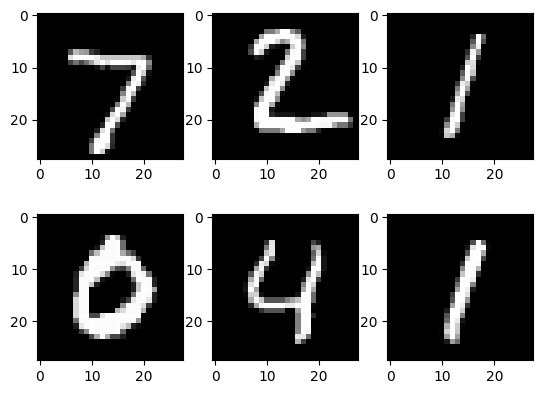

In [23]:


# we can directly iterate datasets in for loop, but for demo purposes we create a iter obj so see whats in ONE batch of dataset
examples = iter(test_loader)
#print(next(examples))
example_data, example_targets = next(examples)


print(example_data.shape)
print(example_data[0].shape)
print(example_targets.shape)


for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [24]:
# Fully connected neural network with one hidden layer

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()

        # define i/p and o/p layers and activation functions in right order
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end cuz CrossEntropyLoss needs raw values, check doc
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device) # pushing model to GPU, then push later all tensors related to model

# Loss and optimizer
criterion = nn.CrossEntropyLoss() # multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model

# usually have two for-loops, first for-loop for no. of epochs -- train longer by INC the epochs
# seconf for-loop for
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  # iterate in optimized way over ALL batches
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device) # reshape and push to GPU
        labels = labels.to(device) # push to GPU

        # Forward pass and loss calculation
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/2], Step [100/600], Loss: 0.3131
Epoch [1/2], Step [200/600], Loss: 0.3224
Epoch [1/2], Step [300/600], Loss: 0.1798
Epoch [1/2], Step [400/600], Loss: 0.1551
Epoch [1/2], Step [500/600], Loss: 0.1890
Epoch [1/2], Step [600/600], Loss: 0.1064
Epoch [2/2], Step [100/600], Loss: 0.1444
Epoch [2/2], Step [200/600], Loss: 0.0753
Epoch [2/2], Step [300/600], Loss: 0.1059
Epoch [2/2], Step [400/600], Loss: 0.1351
Epoch [2/2], Step [500/600], Loss: 0.0530
Epoch [2/2], Step [600/600], Loss: 0.1131


In [25]:
# Test the model: we don't need to compute gradients


with torch.no_grad(): # no gradient computation req now
    n_correct = 0
    n_samples = len(test_loader.dataset)

    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        outputs = model(images)

        # max returns (output_value ,index)
        _, predicted = torch.max(outputs, 1)

        # compare index of prediction with lablels
        n_correct += (predicted == labels).sum().item()

    acc = n_correct / n_samples
    print(f'Accuracy of the network on the {n_samples} test images: {100*acc} %')

Accuracy of the network on the 10000 test images: 96.83 %


## 5. CNN

Above we just used normal neural network lets use CNN\
and example here has COLOR images\
This section covers:

- Convolutional Layers
- MaxPooling
- Save/Load model

100%|██████████| 170498071/170498071 [00:02<00:00, 77948771.91it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


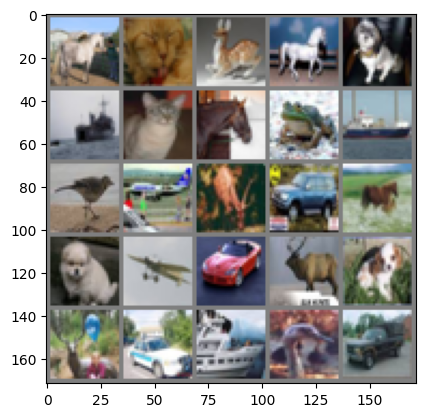

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
num_epochs = 10
batch_size = 32
learning_rate = 0.001

# dataset has PILImage images of range [0, 1].
# We transform them to Tensors that has normalized range [-1, 1] using mean = S.D = (0.5, 0.5, 0.5) for all 3 color channels
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform) # transform as we defined above

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True) # shuffle true for training

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(imgs):
    imgs = imgs / 2 + 0.5   # unnormalize
    npimgs = imgs.numpy()
    plt.imshow(np.transpose(npimgs, (1, 2, 0)))
    plt.show()

# ONE  batch of random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
img_grid = torchvision.utils.make_grid(images[0:25], nrow=5)
imshow(img_grid)

In [2]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        # define all layers we want
        self.conv1 = nn.Conv2d(3, 32, 3) # 3 input channels for RGB, 32 as output size
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 64, 3)
        self.fc1 = nn.Linear(64*4*4, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        # N, 3, 32, 32

        # in above example we defined relu in init, we can do like this too
        x = F.relu(self.conv1(x))   # -> N, 32, 30, 30
        x = self.pool(x)            # -> N, 32, 15, 15
        x = F.relu(self.conv2(x))   # -> N, 64, 13, 13
        x = self.pool(x)            # -> N, 64, 6, 6
        x = F.relu(self.conv3(x))   # -> N, 64, 4, 4
        x = torch.flatten(x, 1)     # -> N, 1024
        x = F.relu(self.fc1(x))     # -> N, 64
        x = self.fc2(x)             # -> N, 10
        return x


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):

    running_loss = 0.0

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize

        optimizer.zero_grad() # after or before iteration, empty gradients
        loss.backward()
        optimizer.step()


        running_loss += loss.item()

    print(f'[{epoch + 1}] loss: {running_loss / n_total_steps:.3f}')

print('Finished Training')
PATH = './cnn.pth' # .pth extension for pytorch
torch.save(model.state_dict(), PATH) # only store train parametres

[1] loss: 1.501
[2] loss: 1.118
[3] loss: 0.949
[4] loss: 0.838
[5] loss: 0.767
[6] loss: 0.703
[7] loss: 0.658
[8] loss: 0.616
[9] loss: 0.575
[10] loss: 0.543
Finished Training


In [3]:
# load from the saved model
loaded_model = ConvNet()
loaded_model.load_state_dict(torch.load(PATH)) # it takes the loaded dictionary, NOT the path file itself
loaded_model.to(device)
loaded_model.eval() # sets internal config better for evaluating NOT Training

with torch.no_grad():
    n_correct = 0
    n_correct2 = 0
    n_samples = len(test_loader.dataset)

    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)

        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_correct += (predicted == labels).sum().item()

        outputs2 = loaded_model(images)
        _, predicted2 = torch.max(outputs2, 1)
        n_correct2 += (predicted2 == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the model: {acc} %')

    acc = 100.0 * n_correct2 / n_samples
    print(f'Accuracy of the loaded model: {acc} %')

Accuracy of the model: 71.74 %
Accuracy of the loaded model: 71.74 %
